# Memory baseline

In this notebook we evaluate the memory baseline (and check for plausibility of the results).

In [3]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from algbench import read_as_pandas

font = {'family': 'serif', 'size': 11}
matplotlib.rc('font', **font)

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['figure.figsize'] = [4.5, 3.5]

In [27]:
results = read_as_pandas('results/classical_benchmark/memory_baseline', lambda row: {
    'algorithm': row['parameters']['args']['solver'],
    'path': row['parameters']['args']['instance']['instance_path'],
    'size': row['parameters']['args']['instance']['size'],
    'used_mb': row['result']['maximum_resident_size_kb'] / 1000,
})

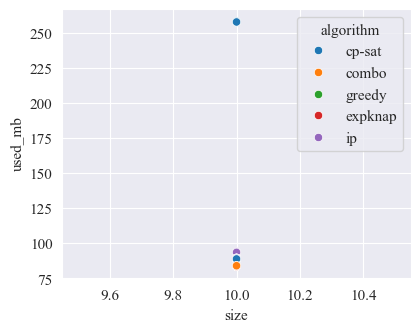

In [28]:
fig, ax = plt.subplots()
sns.scatterplot(results, x='size', y='used_mb', hue='algorithm', ax=ax)
plt.show()

In [29]:
stats = results.groupby(['algorithm', 'size']).describe()

In [30]:
stats['used_mb']['max']-stats['used_mb']['min']

algorithm  size
combo      10        0.628
cp-sat     10      169.272
expknap    10        0.680
greedy     10        0.840
ip         10        5.216
dtype: float64